In [2]:
import keras
from keras import models, layers


In [4]:

#Create the convolution model
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

In [7]:
from keras.optimizers import RMSprop

model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 1e-4), metrics = ['accuracy'])

In [9]:
#Keras preprocess tool helps with image data
from keras.preprocessing.image import ImageDataGenerator

valDir = '/home/noah/Datasets/CatDog/validation'
testDir = '/home/noah/Datasets/CatDog/smallTest'
trainDir = '/home/noah/Datasets/CatDog/smallTrain'

trainDatagen = ImageDataGenerator(rescale = 1.0/255)
testDatagen = ImageDataGenerator(rescale = 1.0/255)


#Go to respective dir and since class mode is binary expect 2 sub folders
trainGen = trainDatagen.flow_from_directory(trainDir,
                                           target_size = (150,150),
                                            batch_size = 20,
                                           class_mode = 'binary')
valGen = testDatagen.flow_from_directory(valDir,
                                           target_size = (150,150),
                                            batch_size = 20,
                                           class_mode = 'binary')

Found 2060 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [15]:
#Generators iterate until break
for x,y in valGen:
    print(y.shape)  #Labels
    print(x.shape)  #Images
    break

(20,)
(20, 150, 150, 3)


In [16]:
#Fit the model using generator
history = model.fit_generator(trainGen,
                             steps_per_epoch = 100,
                             epochs = 10,
                             validation_data = valGen,
                             validation_steps = 50)

model.save('Cats_and_dogs.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
100/100 [==============================] - 28s 275ms/step - loss: 0.6899 - accuracy: 0.5220 - val_loss: 0.6774 - val_accuracy: 0.6100
Epoch 2/10
100/100 [==============================] - 27s 275ms/step - loss: 0.6671 - accuracy: 0.5890 - val_loss: 0.6427 - val_accuracy: 0.6510
Epoch 3/10
100/100 [==============================] - 28s 276ms/step - loss: 0.6236 - accuracy: 0.6505 - val_loss: 0.6122 - val_accuracy: 0.6600
Epoch 4/10
100/100 [==============================] - 28s 275ms/step - loss: 0.5811 - accuracy: 0.6760 - val_loss: 0.5617 - val_accuracy: 0.7280
Epoch 5/10
100/100 [==============================] - 28s 275ms/step - loss: 0.5582 - accuracy: 0.7140 - val_loss: 0.5603 - val_accuracy: 0.7180
Epoch 6/10
100/100 [==============================] - 28s 276ms/step - loss: 0.5370 - accuracy: 0.7260 - val_loss: 0.5438 - val_accuracy: 0.7140
Epoch 7/10
100/100 [==============================] - 

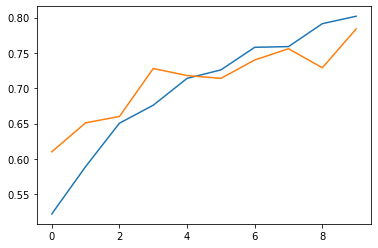

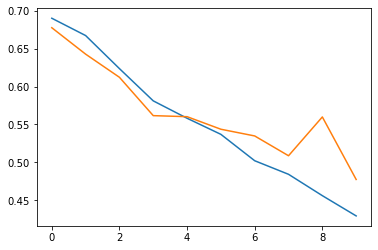

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']

plt.plot(acc)
plt.plot(valAcc)
plt.figure()
plt.plot(loss)
plt.plot(valLoss)
#Orange is validation
#If validation data was all unknown then validation loss/accuracy would cap off much more noticeably


In [24]:
#Next time to use data agumentation
#Create the convolution model 2
model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3)))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(64, (3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Conv2D(128, (3,3), activation = 'relu'))
model2.add(layers.MaxPooling2D((2,2)))
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512,activation = 'relu'))
model2.add(layers.Dense(1, activation = 'sigmoid'))

In [29]:
#Keras preprocess tool helps with image data
from keras.preprocessing.image import ImageDataGenerator


trainDatagen = ImageDataGenerator(rescale = 1.0/255,
                                 rotation_range = 40,
                                 width_shift_range = 0.2,
                                 height_shift_range = 0.2,
                                 shear_range = 0.2,
                                 zoom_range = 0.2,
                                 horizontal_flip = True)
testDatagen = ImageDataGenerator(rescale = 1.0/255)


#Go to respective dir and since class mode is binary expect 2 sub folders
trainGen = trainDatagen.flow_from_directory(trainDir,
                                           target_size = (150,150),
                                            batch_size = 20,
                                           class_mode = 'binary')
valGen = testDatagen.flow_from_directory(valDir,
                                           target_size = (150,150),
                                            batch_size = 20,
                                           class_mode = 'binary')

Found 2060 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [31]:
#Fit the model using generator
#model2.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr = 1e-4), metrics = ['accuracy'])
history = model2.fit_generator(trainGen,
                             steps_per_epoch = 100,
                             epochs = 50,
                             validation_data = valGen,
                             validation_steps = 50)

model.save('Cats_and_dogs_v2.h5')

Epoch 1/50
100/100 [==============================] - 29s 289ms/step - loss: 0.5888 - accuracy: 0.6895 - val_loss: 0.5824 - val_accuracy: 0.6940
Epoch 2/50
100/100 [==============================] - 29s 286ms/step - loss: 0.5834 - accuracy: 0.6855 - val_loss: 0.5826 - val_accuracy: 0.6820
Epoch 3/50
100/100 [==============================] - 28s 284ms/step - loss: 0.5750 - accuracy: 0.6900 - val_loss: 0.6033 - val_accuracy: 0.6940
Epoch 4/50
100/100 [==============================] - 28s 283ms/step - loss: 0.5859 - accuracy: 0.6935 - val_loss: 0.5914 - val_accuracy: 0.7090
Epoch 5/50
100/100 [==============================] - 28s 282ms/step - loss: 0.5802 - accuracy: 0.6885 - val_loss: 0.6773 - val_accuracy: 0.6370
Epoch 6/50
100/100 [==============================] - 28s 283ms/step - loss: 0.5671 - accuracy: 0.7075 - val_loss: 0.6436 - val_accuracy: 0.6530
Epoch 7/50
100/100 [==============================] - 28s 280ms/step - loss: 0.5576 - accuracy: 0.7080 - val_loss: 0.5664 - val_ac

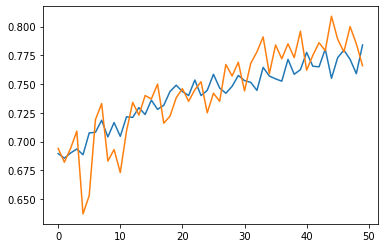

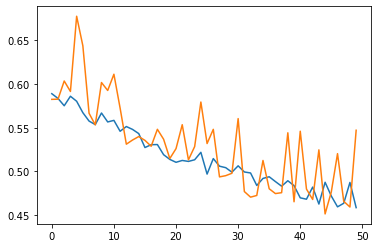

In [32]:
acc = history.history['accuracy']
valAcc = history.history['val_accuracy']
loss = history.history['loss']
valLoss = history.history['val_loss']

plt.plot(acc)
plt.plot(valAcc)
plt.figure()
plt.plot(loss)
plt.plot(valLoss)
